In [1]:
# Imports needed in every section
import pandas as pd
#import testing_scripts.constants as constants
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

In [10]:
df = pd.read_csv('oct_data.csv', index_col=0)


In [99]:
df.columns

Index(['Position', 'Moreinfo', 'Looking For', 'Highlights', 'Primary Keyword',
       'English Level', 'Experience Years', 'CV', 'CV_lang', 'id',
       '__index_level_0__', 'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
       'CVDoorDash PM Score', 'Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CVDoorDash PM Score',
       'Will Manipulate', 'Applicant Reported Scores', 'Testing Scores',
       'input_score', 'hirer_score'],
      dtype='object')

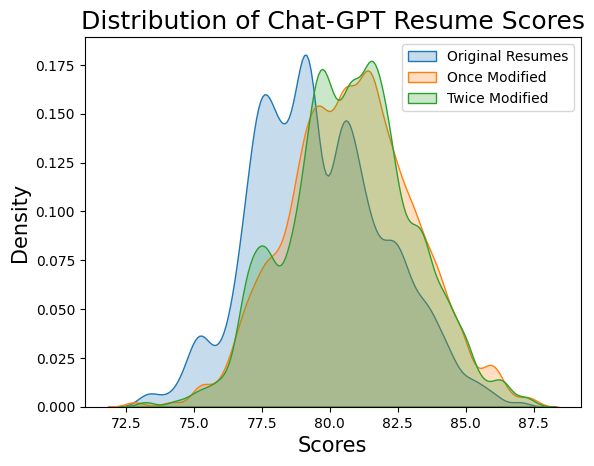

In [122]:
sns.kdeplot(df['CVDoorDash PM Score'], bw_adjust=0.5, fill=True)  # bw_adjust adjusts the smoothness
sns.kdeplot(df['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, fill=True)
#sns.kdeplot(df['CVDoorDash PM Score'], bw_adjust=0.5)  # bw_adjust adjusts the smoothness
sns.kdeplot(df['Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, fill=True)
plt.title('Distribution of Chat-GPT Resume Scores', fontsize=18)
plt.xlabel('Scores', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(['Original Resumes', 'Once Modified', 'Twice Modified'])
#plt.grid()
plt.show()

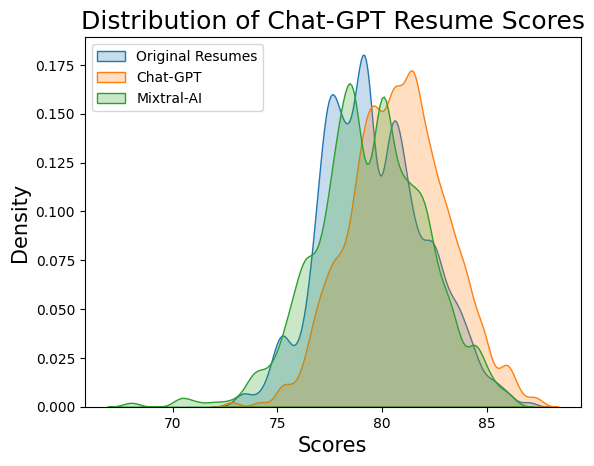

In [123]:
sns.kdeplot(df['CVDoorDash PM Score'], bw_adjust=0.5, fill=True)  # bw_adjust adjusts the smoothness
sns.kdeplot(df['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, fill=True)
#sns.kdeplot(df['CVDoorDash PM Score'], bw_adjust=0.5)  # bw_adjust adjusts the smoothness
sns.kdeplot(df['Cleaned Together Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, fill=True)
plt.title('Distribution of Chat-GPT Resume Scores', fontsize=18)
plt.xlabel('Scores', fontsize=15)
plt.ylabel('Density', fontsize=15)
plt.legend(['Original Resumes', 'Chat-GPT', 'Mixtral-AI'])
#plt.grid()
plt.show()

In [11]:
df.groupby(['Will Manipulate', 'True Label']).count()

Position  Moreinfo  Looking For  Highlights  \
Will Manipulate True Label                                                
False           0                130       130           90         100   
                1                130       130           73          96   
True            0                130       130          102         106   
                1                130       130           73          99   

                            Primary Keyword  English Level  Experience Years  \
Will Manipulate True Label                                                     
False           0                       130            130               130   
                1                       130            130               130   
True            0                       130            130               130   
                1                       130            130               130   

                             CV  CV_lang   id  ...  \
Will Manipulate True Label                     ...   
False           0           130      130  130  ...   
                1           130      130  130  ...   
True            0           130      130  130  ...   
                1           130      130  130  ...   

                            Twice GPT-4o Conversation-Improved CV  \
Will Manipulate True Label                                          
False           0                                             130   
                1                                             130   
True            0                                             130   
                1                                             130   

                            Cleaned Twice GPT-4o Conversation-Improved CV  \
Will Manipulate True Label                                                  
False           0                                                     130   
                1                                                     130   
True            0                                                     130   
                1                                                     130   

                            Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score  \
Will Manipulate True Label                                                             
False           0                                                         130          
                1                                                         130          
True            0                                                         130          
                1                                                         130          

                            Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score  \
Will Manipulate True Label                                                                   
False           0                                                         130                
                1                                                         130                
True            0                                                         130                
                1                                                         130                

                            CVDoorDash PM Score  \
Will Manipulate True Label                        
False           0                           130   
                1                           130   
True            0                           130   
                1                           130   

                            Together Conversation-Improved CV  \
Will Manipulate True Label                                      
False           0                                         130   
                1                                         130   
True            0                                         130   
                1                                         130   

                            Cleaned Together Conversation-Improved CV  \
Will Manipulate True Label  

In [12]:
# one ticket system
def map_input_score(row):
    if row['Will Manipulate']:
        return max(row['CVDoorDash PM Score'], row['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'])
    else:
        return row['CVDoorDash PM Score']

def map_hirer_score(row):
    if row['Will Manipulate']:
        return max(row['input_score'], row['Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score'])
    else:
        return max(row['input_score'], row['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'])

# Assuming your DataFrame is named 'df'
df['input_score'] = df.apply(map_input_score, axis=1)
df['hirer_score'] = df.apply(map_hirer_score, axis=1)
# check statistics
df.groupby('True Label')[['input_score', 'hirer_score']].describe()
#

input_score                                                 \
                 count       mean       std     min       25%     50%   
True Label                                                              
0                260.0  79.072608  2.039091  73.895  77.69050  79.072   
1                260.0  81.293404  2.489718  73.121  79.72075  81.390   

                             hirer_score                               \
                 75%     max       count       mean       std     min   
True Label                                                              
0           80.48825  86.701       260.0  79.963765  1.836395  76.001   
1           83.13275  86.998       260.0  82.122512  2.207033  73.121   

                                                
                 25%      50%      75%     max  
True Label                                      
0           78.73025  79.9340  81.1080  86.701  
1           80.73800  82.2345  83.6825  87.404

In [131]:
np.mean(df[df['Will Manipulate']==1]['input_score']), np.mean(df[df['Will Manipulate']==0]['input_score'])

(81.02383846153846, 79.34217307692307)

In [134]:
np.mean(df[df['Will Manipulate']==1]['hirer_score']), np.mean(df[df['Will Manipulate']==0]['hirer_score'])


(81.15616538461538, 80.93011153846153)

In [127]:
def set_threshold_min_fpr(scores, labels, min_tpr=0.01):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)

    # Find the index where TPR is just above min_tpr
    valid_idx = np.where(tpr >= min_tpr)[0]
    if len(valid_idx) > 0:
        best_idx = valid_idx[0]
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]
    else:
        # If no threshold gives TPR >= min_tpr, return the threshold with highest TPR
        best_idx = np.argmax(tpr)
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]

def set_threshold_zero_fpr(scores, labels):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    #print(fpr, tpr, thresholds)
    # Find the index of the first non-zero false positive rate
    zero_fpr_index = np.argwhere(fpr > 0)[0][0] - 1

    # Get the threshold that gives zero false positive rate
    threshold = thresholds[zero_fpr_index]

    return threshold

def calculate_disparity(y_true, y_pred, y_manipulate_label):

    y_true_a = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]
    y_pred_a = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]

    y_true_b = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    y_pred_b = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    #print(np.mean(y_true_a), np.mean(y_true_b))

    tn_a, fp_a, fn_a, tp_a = confusion_matrix(y_true_a, y_pred_a).ravel()
    tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_b, y_pred_b).ravel()

    tpr_a = tp_a/(tp_a + fn_a)
    tpr_b = tp_a/(tp_b + fn_b)
    return tpr_a - tpr_b

def calculate_tpr(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    return tpr, fnr

num_iter = 500
results = []
for i in range(num_iter):
  train_df = df.sample(frac=0.6, random_state=i)
  test_df = df.drop(train_df.index)
  ## one ticket
  threshold, train_fpr, train_tpr = set_threshold_min_fpr(train_df['input_score'], train_df['True Label'])
  threshold_no_LLM, train_fpr_no_LLM, train_tpr_no_LLM = set_threshold_min_fpr(train_df['CVDoorDash PM Score'], train_df['True Label'])
  #print(f"Threshold: {threshold}")
  #print(f"Training FPR: {train_fpr:.4f}, TPR: {train_tpr:.4f}")
  # find tpr
  test_predictions_1ticket = [1 if score >= threshold else 0 for score in test_df['input_score']]
  test_labels = test_df['True Label'].values
  test_manipulate_label = test_df['Will Manipulate'].values

  #Calculate TPR on test set
  test_predictions_no_LLM = [1 if score >= threshold_no_LLM else 0 for score in test_df['CVDoorDash PM Score']]
  test_labels = test_df['True Label'].values

  # Calculate TPR on the test set
  test_tpr_noLLM, test_fnr_noLLM = calculate_tpr(test_labels, test_predictions_no_LLM)
  test_disparity_noLLM = calculate_disparity(test_labels, test_predictions_no_LLM, test_manipulate_label)

  # Calculate TPR on the test set
  test_tpr_1ticket, test_fnr_1ticket = calculate_tpr(test_labels, test_predictions_1ticket)
  test_disparity_1_ticket = calculate_disparity(test_labels, test_predictions_1ticket, test_manipulate_label)
  #print(f"True Positive Rate on 1 ticket test set: {test_tpr_1ticket:.2f}")

  ## two ticket
  test_predictions_2ticket = [1 if score >= threshold else 0 for score in test_df['hirer_score']]
  test_labels = test_df['True Label'].values

  # Calculate TPR, FNR, and Disparity on the test set
  test_tpr_2ticket, test_fnr_2ticket = calculate_tpr(test_labels, test_predictions_2ticket)
  test_disparity_2_ticket = calculate_disparity(test_labels, test_predictions_2ticket, test_manipulate_label)
  #print(f"True Positive Rate on 2 ticket test set: {test_tpr_2ticket:.2f}")

  results.append({'Threshold': threshold,
                  'train_fpr': train_fpr,
                  'train_tpr': train_tpr,
                  'test_tpr_nomanipulation': test_tpr_noLLM,
                  'test_tpr_1ticket': test_tpr_1ticket,
                  'test_tpr_2ticket': test_tpr_2ticket,
                  'test_fnr_1ticket': test_fnr_1ticket,
                  'test_fnr_2ticket': test_fnr_2ticket,
                  'num_accepted_1ticket': sum(test_predictions_1ticket),
                  'num_accepted_2ticket': sum(test_predictions_2ticket),
                  'tpr_no_LLM_to_1': test_tpr_1ticket-test_tpr_noLLM,
                  'tpr_improvement': test_tpr_2ticket - test_tpr_1ticket,
                  'tpr_improvement_b': True if test_tpr_2ticket - test_tpr_1ticket > 0 else False,
                  'test_disparity_1ticket': test_disparity_1_ticket,
                  'test_disparity_2_ticket': test_disparity_2_ticket,
                  'disparity_decrease_2_1': test_disparity_2_ticket -test_disparity_1_ticket,
                  #'disparity_decrease_1_vs_no': test_disparity_1_ticket - test_disparity_noLLM
                  })

In [84]:
results_df = pd.DataFrame(results)
results_df.describe()

,Threshold,train_fpr,train_tpr,test_tpr_nomanipulation,test_tpr_1ticket,test_tpr_2ticket,test_fnr_1ticket,test_fnr_2ticket,num_accepted_1ticket,num_accepted_2ticket,tpr_no_LLM_to_1,tpr_improvement,test_disparity_1ticket,test_disparity_2_ticket,disparity_decrease_2_1,disparity_decrease_1_vs_no
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,84.301942,0.004017,0.118061,0.046598,0.112987,0.164622,0.887013,0.835378,12.636000,19.008000,0.066389,0.051635,-0.002353,-0.002434,-0.000081,-0.001432
std,0.467547,0.003114,0.045782,0.027414,0.050614,0.068005,0.050614,0.068005,5.894488,7.932072,0.042447,0.024100,0.026698,0.031865,0.005933,0.019018
min,82.902000,0.000000,0.033113,0.000000,0.026786,0.049505,0.707547,0.594340,3.000000,6.000000,-0.056075,0.000000,-0.134685,-0.145045,-0.028100,-0.103604
25%,83.815000,0.000000,0.080345,0.028571,0.070132,0.108710,0.843137,0.775701,8.000000,12.000000,0.035321,0.033613,-0.017011,-0.020458,-0.002580,-0.010228
50%,84.705000,0.006211,0.097482,0.039604,0.099505,0.141414,0.900495,0.858586,11.000000,16.000000,0.050763,0.048077,0.000000,0.000000,0.000000,0.000000
75%,84.705000,0.006452,0.159509,0.057143,0.156863,0.224299,0.929868,0.891290,17.250000,26.000000,0.099032,0.067838,0.014377,0.017883,0.002421,0.009266
max,84.998000,0.007246,0.253425,0.180000,0.292453,0.405660,0.973214,0.950495,37.000000,51.000000,0.254717,0.141414,0.069732,0.084674,0.022248,0.060746


/var/folders/6d/ffdjbx496k5dqjgrkzxf2zlw0000gp/T/ipykernel_90112/3748533691.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Ticket Type', y='TPR', data=df_melted,


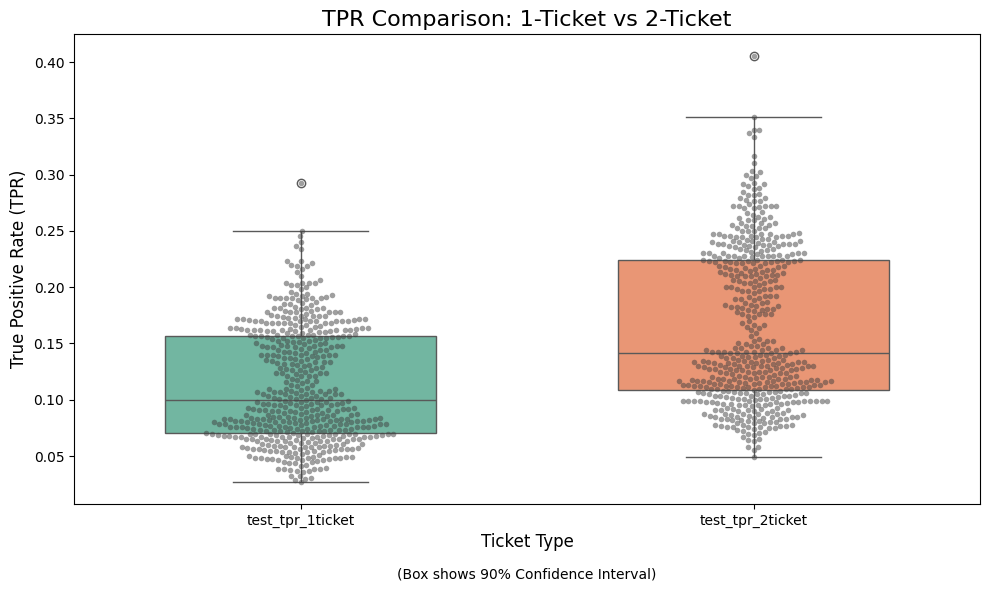

In [67]:
# Reshape the data for seaborn
df_melted = pd.melt(results_df, value_vars=['test_tpr_1ticket', 'test_tpr_2ticket'],
                    var_name='Ticket Type', value_name='TPR')

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticket Type', y='TPR', data=df_melted,
            width=0.6, palette='Set2')
sns.swarmplot(x='Ticket Type', y='TPR', data=df_melted,
              color=".25", size=4, alpha=0.5)

# Add confidence intervals
#sns.boxplot(x='Ticket Type', y='TPR', data=df_melted,
              # color='white', width=0.15, saturation=1,
              # showfliers=False, whis=[5, 95])

# Customize the plot
plt.title('TPR Comparison: 1-Ticket vs 2-Ticket', fontsize=16)
plt.xlabel('Ticket Type', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)

# Add text for 95% CI
plt.text(0.5, -0.15, '(Box shows 90% Confidence Interval)',
         ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()

In [80]:
train = df.sample(frac=0.7, random_state=i)

test= df.drop(train.index)
train.reset_index()
test.reset_index()
fpr_unmanipulated, tpr_unmanipulated, thresholds_unmani = roc_curve(train['True Label'], train['CVDoorDash PM Score'])
fpr_1ticket, tpr_1ticket, thresholds_1ticket = roc_curve(train['True Label'], train['input_score'])

In [81]:
train

,Position,Moreinfo,Looking For,Highlights,Primary Keyword,English Level,Experience Years,CV,CV_lang,id,...,Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score,CVDoorDash PM Score,Together Conversation-Improved CV,Cleaned Together Conversation-Improved CV,Cleaned Together Conversation-Improved CVDoorDash PM Score,Will Manipulate,Applicant Reported Scores,Testing Scores,input_score,hirer_score
439,Junior Project Manager,My experience may be of your interests. For t...,NaN,NaN,Project Manager,fluent,0.0,\nMy experience may be of your interests. For...,en,f4b7264e-799b-599f-baf8-f4b99c765c4f,...,81.352,80.513,"Here is your updated resume, while ensuring t...","Here is your updated resume, while ensuring t...",78.988,False,80.513,81.352,80.513,81.275
251,Junior UI/UX Designer,During the study in GoIT I created 4 projects....,NaN,"I was a team leader in two team projects - ""Ne...",Design,upper,0.0,"I was a team leader in two team projects - ""Ne...",en,b2cba638-f7aa-5487-9a65-4b7f8bbc7e36,...,82.404,80.222,Here is your improved resume:\n\n**Experience...,Here is your improved resume:Experience: Team...,78.615,False,80.222,82.404,80.222,82.108
352,Junior Project Manager,I am already working in IT but my duties combi...,I am looking for a well-paid job where I can i...,NaN,Project Manager,fluent,0.5,\nI am already working in IT but my duties com...,en,56a8ffff-a10d-5bc6-8ecf-bae18047195b,...,84.979,82.434,Here's your updated resume:\n\n---\n\n**Objec...,Here's your updated resume:---Objective: Seek...,82.519,True,84.327,84.979,84.327,84.979
73,Junior UI/UX Designer,"Hi! I'm a Junior UI/UX designer, specializing ...",I'd like to work in a company with a team of p...,Had a successful experience woking in a team. ...,Design,intermediate,0.0,Had a successful experience woking in a team. ...,en,6d7c8276-72aa-5a3d-84c3-1ca345026a68,...,79.279,79.212,Had a successful experience working in a team...,Had a successful experience working in a team...,78.679,True,78.447,79.279,79.212,79.279
392,Junior Project Manager,I worked as a store manager for 11 years. Main...,NaN,Achievements in the position of store manager:...,Project Manager,intermediate,0.0,Achievements in the position of store manager:...,en,0fcfc55f-aedc-5d8b-bad9-f0299dbea93b,...,85.447,83.997,Resume:\n\nAchievements as Store Manager (11 ...,Resume:Achievements as Store Manager (11 year...,85.905,False,83.997,85.447,83.997,86.199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,Junior Project Manager,- Understanding the project management process...,Now I am looking a new opportunity to work as ...,• Implemented various projects in terms of com...,Project Manager,intermediate,0.5,• Implemented various projects in terms of com...,en,89db3254-0022-5ec4-b614-e5f76d4d5e45,...,83.550,82.206,"Here is your updated resume, maintaining all ...","Here is your updated resume, maintaining all ...",81.246,False,82.206,83.550,82.206,83.535
452,Junior Project Manager,My skills:\r\n\r\n-English B2\r\n-Scrum\r\n-Ag...,NaN,NaN,Project Manager,upper,0.5,\nMy skills:\r\n\r\n-English B2\r\n-Scrum\r\n-...,en,7a294c40-f9de-5208-bb3c-6bece836d843,...,81.497,80.719,Here is your updated resume with improved for...,Here is your updated resume with improved for...,82.002,False,80.719,81.497,80.719,82.030
56,Junior UI/UX Designer,Hello! My name is Anna. I am a junior UI/UX de...,Friendly and creative team. Possibility of rem...,"I was a team leader in the project ""Web servic...",Design,basic,0.5,"I was a team leader in the project ""Web servic...",en,b0bab3fc-e812-51db-a5b7-8222603b3e6f,...,77.329,79.123,Anna\nJunior UI/UX Designer\n\nExperience:\n\...,AnnaJunior UI/UX DesignerExperience: Team Lea...,77.727,True,77.266,77.329,79.123,79.123
247,Junior UI/UX Designer,Developed databases for an automated workstati...,Now I'm studying ux design and taking a course...,I participated in the hackathon in which I lis...,Design,intermediate,0.0,I participated in th

In [82]:
#[1 if score >= threshold else 0 for score in test_df['CVDoordash']]
un_manipulated_thres = set_threshold_zero_fpr(train['CVDoorDash PM Score'], train['True Label'])

manipulated_thres = set_threshold_zero_fpr(train['input_score'], train['True Label'])
print(sum([1 for i in range(len(train)) if train.loc[i]['input_score']>manipulated_thres]))

KeyError: 10

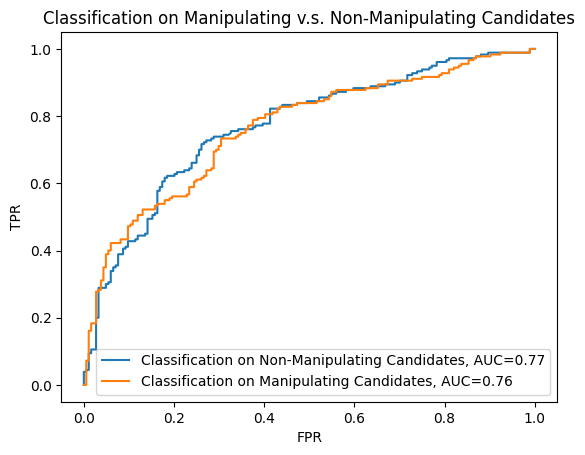

In [89]:
roc_auc_un = metrics.auc(fpr_unmanipulated, tpr_unmanipulated)
roc_auc_1 = metrics.auc(fpr_1ticket, tpr_1ticket)
#auc = round(metrics.roc_auc_score(y_test, y_pred), 4)
plt.title("Classification on Manipulating v.s. Non-Manipulating Candidates")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.plot(fpr_unmanipulated,tpr_unmanipulated,label="Classification on Non-Manipulating Candidates, AUC="+str(round(roc_auc_un, 2)))
plt.plot(fpr_1ticket,tpr_1ticket,label="Classification on Manipulating Candidates, AUC="+str(round(roc_auc_1, 2)))
#display.plot()
plt.legend()
plt.savefig("manipulation_worsens.png")
plt.show()


In [43]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
'''y = np.array([0, 0, 1, 1])
pred = np.array([0.1, 0.4, 0.35, 0.8])
fpr, tpr, thresholds = metrics.roc_curve(y, pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

plt.show()'''

"y = np.array([0, 0, 1, 1])\npred = np.array([0.1, 0.4, 0.35, 0.8])\nfpr, tpr, thresholds = metrics.roc_curve(y, pred)\nroc_auc = metrics.auc(fpr, tpr)\ndisplay = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,\n                                  estimator_name='example estimator')\ndisplay.plot()\n\nplt.show()"

/var/folders/6d/ffdjbx496k5dqjgrkzxf2zlw0000gp/T/ipykernel_21940/492999276.py:22: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<Figure size 1000x700 with 0 Axes>

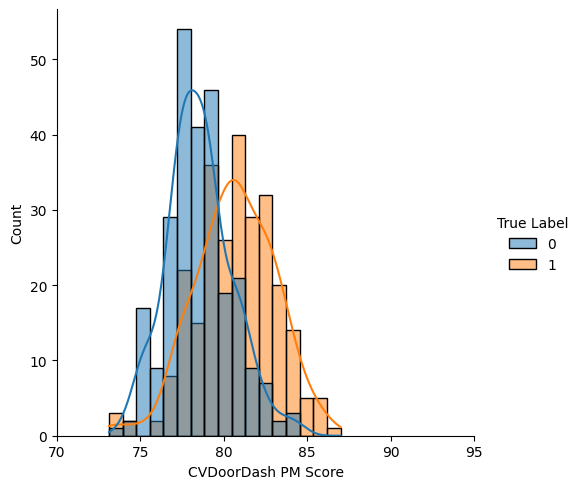

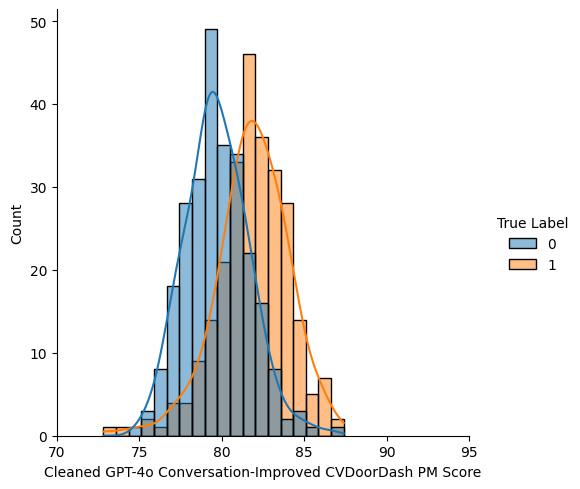

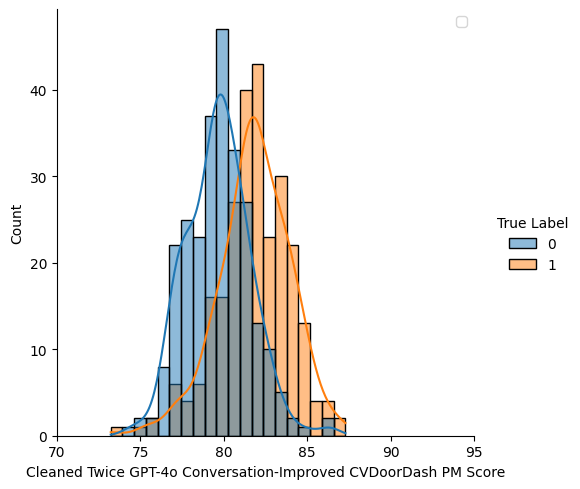

In [ ]:
# Import data
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
kwargs = dict(hist_kws={'alpha':.6}, kde_kws={'linewidth':2})
og_col = 'CVDoorDash PM Score'
one_mod_col = "Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score"
twice_mod_col = "Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score"
plt.figure(figsize=(10,7), dpi= 100)
sns.displot(data=finaldata, x="CVDoorDash PM Score", hue = 'True Label', kde=True)
plt.xlim(70,95)
#ee.map(specs,'CV Score')
sns.displot(data=finaldata, x=one_mod_col, hue = 'True Label', kde=True)
plt.xlim(70,95)
sns.displot(data=finaldata, x=twice_mod_col, hue = 'True Label', kde=True)

#sns.displot(data=truedata, x="CV Score", color = 'deeppink', kde=True)
###sns.displot(x1, color="dodgerblue", label="Compact", **kwargs)
#sns.displot(x2, color="orange", label="SUV", **kwargs)
#sns.displot(x3, color="deeppink", label="minivan", **kwargs)
plt.xlim(70,95)
plt.legend()

In [ ]:
import numpy as np
'''(+) Mean
(+) STD
(-) Mean
(-) STD
Overall Mean'''
print("Original Score")
print("+ Mean:", np.mean(list(finaldata[finaldata['True Label']==1][og_col])))
print("+ STD:", np.std(list(finaldata[finaldata['True Label']==1][og_col])))
print("- Mean:", np.mean(list(finaldata[finaldata['True Label']==0][og_col])))
print("- STD:", np.std(list(finaldata[finaldata['True Label']==0][og_col])))
print("All Mean:", np.mean(list(finaldata[og_col])))
print("All STD:", np.std(list(finaldata[og_col])))

print("Once Mod Score")
print("+ Mean:", np.mean(list(finaldata[finaldata['True Label']==1][one_mod_col])))
print("+ STD:", np.std(list(finaldata[finaldata['True Label']==1][one_mod_col])))
print("- Mean:", np.mean(list(finaldata[finaldata['True Label']==0][one_mod_col])))
print("- STD:", np.std(list(finaldata[finaldata['True Label']==0][one_mod_col])))
print("All Mean:", np.mean(list(finaldata[one_mod_col])))
print("All STD:", np.std(list(finaldata[one_mod_col])))

print("Twice Mod Score")
print("+ Mean:", np.mean(list(finaldata[finaldata['True Label']==1][twice_mod_col])))
print("+ STD:", np.std(list(finaldata[finaldata['True Label']==1][twice_mod_col])))
print("- Mean:", np.mean(list(finaldata[finaldata['True Label']==0][twice_mod_col])))
print("- STD:", np.std(list(finaldata[finaldata['True Label']==0][twice_mod_col])))
print("All Mean:", np.mean(list(finaldata[twice_mod_col])))
print("All STD:", np.std(list(finaldata[twice_mod_col])))

Original Score
+ Mean: 80.68283076923079
+ STD: 2.4001032049555433
- Mean: 78.52512692307694
- STD: 1.93339949790671
All Mean: 79.60397884615385
All STD: 2.4317043361392994
Once Mod Score
+ Mean: 81.86902692307693
+ STD: 2.2116990865113517
- Mean: 79.71520769230769
- STD: 1.9270170299680751
All Mean: 80.79211730769231
All STD: 2.3371431409391477
Twice Mod Score
+ Mean: 81.82341923076923
+ STD: 2.154062836830623
- Mean: 79.64893846153845
- STD: 1.9121587005824117
All Mean: 80.73617884615385
All STD: 2.308735683128867


In [ ]:
adv_true = 0
adv_neg = 0
marked_for_advantage = []
for index, row in input_data.iterrows():
    if row['True Label'] == 1:
        if adv_true < 25:
            marked_for_advantage.append(1)
        else:
            marked_for_advantage.append(0)
        adv_true +=1

    if row['True Label'] == 0:
        if adv_neg < 25:
            marked_for_advantage.append(1)
        else:
            marked_for_advantage.append(0)
        adv_neg +=1


In [ ]:
input_data['Applicant Will Manipulate'] = marked_for_advantage

In [ ]:
len(input_data[(input_data['Applicant Will Manipulate']==1) & (input_data['True Label']==0)])

25

In [ ]:
input_data.columns

Index(['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'Position', 'Moreinfo', 'Looking For', 'Highlights', 'Primary Keyword',
       'English Level', 'Experience Years', 'CV', 'CV_lang', 'id',
       '__index_level_0__', 'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV', 'CV Score',
       'Cleaned GPT-4o Conversation-Improved CV Score',
       'Cleaned Twice GPT-4o Conversation-Improved CV Score', 'CVBIT PM Score',
       'Cleaned GPT-4o Conversation-Improved CVBIT PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score',
       'Applicant Will Manipulate'],
      dtype='object')

In [ ]:
def add_applicant_scores(input_csv, no_mod_col, mod_one_col, twice_mod_col, job_name:str = ""):
    applicant_scores = []
    for index, row in input_csv.iterrows():
        if row['Applicant Will Manipulate'] ==1:
            #print(input_csv[one_mod_col])
            applicant_scores.append(max(row[mod_one_col], row[no_mod_col]))
        else:
            applicant_scores.append(row[no_mod_col])
    input_csv[job_name + " Applicant Reported Scores"] = applicant_scores
    return

def add_two_ticket_scores(input_csv, reported_col, mod_one_col, twice_mod_col, job_name:str = ""):
    testing_scores = []
    for index, row in input_csv.iterrows():
        if row['Applicant Will Manipulate']==1:
            testing_scores.append(max(row[reported_col], row[twice_mod_col]))
        else:
            testing_scores.append(max(row[reported_col], row[mod_one_col]))
    input_csv[job_name + " Testing Scores"] = testing_scores

In [ ]:
add_applicant_scores(input_data, "CVBIT PM Score", "Cleaned GPT-4o Conversation-Improved CVBIT PM Score", 'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score', 'BIT PM')

In [ ]:
add_two_ticket_scores(input_data, "BIT PM Applicant Reported Scores", "Cleaned GPT-4o Conversation-Improved CVBIT PM Score", 'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score', 'BIT PM')

In [ ]:
final_data.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'Position', 'Moreinfo', 'Looking For', 'Highlights',
       'Primary Keyword', 'English Level', 'Experience Years', 'CV', 'CV_lang',
       'id', '__index_level_0__', 'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV', 'CV Score',
       'Cleaned GPT-4o Conversation-Improved CV Score',
       'Cleaned Twice GPT-4o Conversation-Improved CV Score', 'CVBIT PM Score',
       'Cleaned GPT-4o Conversation-Improved CVBIT PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVBIT PM Score',
       'Applicant Will Manipulate', ' Applicant Reported Scores',
       'BIT PM Applicant Reported Scores', 'BIT PM Testing Scores',
       ' Testing Scores'],
      dtype='object')

In [ ]:
#add_two_ticket_scores(input_data, " Applicant Reported Scores", "Cleaned GPT-4o Conversation-Improved CV Score", 'Cleaned Twice GPT-4o Conversation-Improved CV Score')

In [ ]:
input_data.to_csv('data/connie_data.csv')

In [ ]:
output_data = pd.read_csv("data/connie_data.csv")
output_data.head

In [ ]:
row_chosen = random.choice([i for i in range(len(output_data))])
row_chosen

139

In [ ]:
finaldata.columns

Index(['Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Position', 'Moreinfo',
       'Looking For', 'Highlights', 'Primary Keyword', 'English Level',
       'Experience Years', 'CV', 'CV_lang', 'id', '__index_level_0__',
       'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
       'CVDoorDash PM Score', 'Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CVDoorDash PM Score',
       'Will Manipulate', 'Applicant Reported Scores', 'Testing Scores'],
      dtype='object')

In [ ]:
#positive_cv_scores = original_positive_cv_scores
#negative_cv_scores = original_negative_cv_scores
#positive_name: str = "Original PM"          # change me
#negative_name: str = "Original UI"          # change me

output_data = finaldata
positive_cv_scores_one_ticket = list(output_data[output_data['True Label']==1]['Applicant Reported Scores'])
negative_cv_scores_one_ticket = list(output_data[output_data['True Label']==0]['Applicant Reported Scores'])
positive_name: str = "Tailored PM"          # change me
negative_name: str = "Tailored UI"          # change me


def conservatively_optimal_TPR_and_Threshold(positive_cv_scores, negative_cv_scores, positive_name, negative_name):
    '''
    Collect key statistics
    '''
    #print(num_positive_scores, num_negative_scores)
    num_positive_scores = len(positive_cv_scores)
    num_negative_scores = len(negative_cv_scores)
    print(num_positive_scores, num_negative_scores)
    positive_proportion = num_positive_scores / (num_positive_scores + num_negative_scores)
    negative_proportion = 1 - positive_proportion

    positive_mean = np.mean(positive_cv_scores)
    positive_std = np.std(positive_cv_scores)
    negative_mean = np.mean(negative_cv_scores)
    negative_std = np.std(negative_cv_scores)

    from sklearn.metrics import roc_curve, auc
    y_true = np.concatenate((np.ones(num_positive_scores), np.zeros(num_negative_scores)))
    y_score = np.concatenate((positive_cv_scores, negative_cv_scores))
    FPRs, TPRs, thresholds = roc_curve(y_true, y_score, drop_intermediate=False)
    roc_auc = auc(FPRs, TPRs)

    accuracies = positive_proportion * TPRs + negative_proportion * (1 - FPRs)
    optimal_index = np.argmax(accuracies)
    optimal_accuracy = accuracies[optimal_index]
    optimal_threshold = thresholds[optimal_index]
    optimal_TPR = TPRs[optimal_index]
    optimal_TNR = 1 - FPRs[optimal_index]

    conservatively_optimal_index = np.argmax(np.where(FPRs == 0, TPRs, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
    conservatively_optimal_TPR = TPRs[conservatively_optimal_index]
    conservatively_optimal_threshold = thresholds[conservatively_optimal_index]

    return {"TPR":conservatively_optimal_TPR, "Threshold":conservatively_optimal_threshold}

def conservatively_optimal_TPR_difference_A_B(dataframe, threshold):
    total = len(dataframe)
    TPR_A = 0
    TPR_B=0
    a_s, b_s = 0, 0
    for index, row in dataframe.iterrows():
        if row['Will Manipulate']==1:
            #print(row['True Label'], row['CVBIT PM Score'])
            if row['True Label']==1:
                if row['CVDoorDash PM Score'] >=threshold:
                    TPR_A +=1
            a_s+=1
        else:
            if row['True Label']==1:
                if row['CVDoorDash PM Score'] >=threshold:
                    TPR_B +=1
            b_s+=1
    return TPR_A/a_s-TPR_B/b_s


In [ ]:
finaldata.columns

Index(['Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4', 'Unnamed: 0.3',
       'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'Position', 'Moreinfo',
       'Looking For', 'Highlights', 'Primary Keyword', 'English Level',
       'Experience Years', 'CV', 'CV_lang', 'id', '__index_level_0__',
       'True Label', 'Marked for Experiments',
       'GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CV',
       'Twice GPT-4o Conversation-Improved CV',
       'Cleaned Twice GPT-4o Conversation-Improved CV',
       'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
       'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
       'CVDoorDash PM Score', 'Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CV',
       'Cleaned Together Conversation-Improved CVDoorDash PM Score',
       'Will Manipulate', 'Applicant Reported Scores', 'Testing Scores'],
      dtype='object')

In [ ]:
#positive_cv_scores = original_positive_cv_scores
#negative_cv_scores = original_negative_cv_scores
#positive_name: str = "Original PM"          # change me
#negative_name: str = "Original UI"          # change me

positive_cv_scores_1 = list(output_data[output_data['True Label']==1]['Applicant Reported Scores'])
negative_cv_scores_1 = list(output_data[output_data['True Label']==0]['Applicant Reported Scores'])
positive_name_1: str = "Tailored PM"          # change me
negative_name_1: str = "Tailored UI"          # change me

one_ticket_TPR_and_Threshold = conservatively_optimal_TPR_and_Threshold(positive_cv_scores_1, negative_cv_scores_1, positive_name_1, negative_name_1)
one_ticket_TPR = one_ticket_TPR_and_Threshold['TPR']
one_ticket_treshold = one_ticket_TPR_and_Threshold['Threshold']

TPR_diff_1 = conservatively_optimal_TPR_difference_A_B(output_data, one_ticket_treshold)
print("1 Ticket Results:\n")
print("Conservatively Optimal TPR", one_ticket_TPR)
print("Conservatively Optimal Threshold", one_ticket_treshold)
print("Difference in TPR_A - TPR_B:", TPR_diff_1)



260 260
1 Ticket Results:

Conservatively Optimal TPR 0.0
Conservatively Optimal Threshold 86.701
Difference in TPR_A - TPR_B: 0.0038461538461538464


In [ ]:
#positive_cv_scores = original_positive_cv_scores
#negative_cv_scores = original_negative_cv_scores
#positive_name: str = "Original PM"          # change me
#negative_name: str = "Original UI"          # change me

positive_cv_scores_2 = list(output_data[output_data['True Label']==1]['Testing Scores'])
negative_cv_scores_2 = list(output_data[output_data['True Label']==0]['Testing Scores'])
positive_name_2: str = "Tailored PM"          # change me
negative_name_2: str = "Tailored UI"          # change me

two_ticket_TPR_and_Threshold = conservatively_optimal_TPR_and_Threshold(positive_cv_scores_2, negative_cv_scores_2, positive_name_2, negative_name_2)
two_ticket_TPR = two_ticket_TPR_and_Threshold['TPR']
two_ticket_treshold = two_ticket_TPR_and_Threshold['Threshold']

TPR_diff_2 = conservatively_optimal_TPR_difference_A_B(output_data, two_ticket_treshold)


print("Two Ticket Results:\n")
print("Conservatively Optimal TPR", two_ticket_TPR)
print("Conservatively Optimal Threshold", two_ticket_treshold)
print("Difference in TPR_A - TPR_B:", TPR_diff_2)



260 260
Two Ticket Results:

Conservatively Optimal TPR 0.011538461538461539
Conservatively Optimal Threshold 86.398
Difference in TPR_A - TPR_B: 0.0038461538461538464


In [ ]:
#Bootstrapping Test
from random import sample
import random
from sklearn.metrics import roc_curve, auc
output_data = finaldata

testing_scores = 'Testing Scores'
applicant_scores = 'Applicant Reported Scores'
samples_one_ticket = list(output_data[applicant_scores])
samples_two_ticket = list(output_data[testing_scores])

tpr_two_tickets = []
tpr_one_tickets = []
tpr_diffs_two_tickets = []
tpr_diffs_one_tickets = []

for test_index in range(1000):
    one_tick_pos= []
    two_tick_pos = []

    one_tick_neg = []
    two_tick_neg = []

    #Randomly sample 500 from population. Assign to +/- class accordingly
    '''for elem in range(0, 500):
        #subdata = output_data[output_data['True Label']==1]
        row_chosen = random.choice([i for i in range(len(output_data))])

        if output_data.loc[row_chosen]['True Label']==1:
            one_tick_pos.append([output_data.loc[row_chosen][applicant_scores]])
            two_tick_pos.append([output_data.loc[row_chosen][testing_scores]])
        else:
            one_tick_neg.append([output_data.loc[row_chosen][applicant_scores]])
            two_tick_neg.append([output_data.loc[row_chosen][testing_scores]])
'''
    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==1) & (output_data['Will Manipulate']==True)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_pos.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_pos.append([output_data.loc[row_chosen][testing_scores]])
    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==1) & (output_data['Will Manipulate']==False)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_pos.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_pos.append([output_data.loc[row_chosen][testing_scores]])

    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==0) & (output_data['Will Manipulate']==False)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_neg.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_neg.append([output_data.loc[row_chosen][testing_scores]])

    for elem in range(0, 100):
        subdata = output_data[(output_data['True Label']==0) & (output_data['Will Manipulate']==True)]
        row_chosen = random.choice([i for i in range(len(subdata))])

        one_tick_neg.append([output_data.loc[row_chosen][applicant_scores]])
        two_tick_neg.append([output_data.loc[row_chosen][testing_scores]])


   # print(len(one_tick_neg)+len(one_tick_pos))#+len(two_tick_pos))
    y_one_tick_true = np.concatenate((np.ones(len(one_tick_pos)), np.zeros(len(one_tick_neg))))
    y_two_tick_true = np.concatenate((np.ones(len(two_tick_pos)), np.zeros(len(two_tick_neg))))
    y_one_tick_scores_true = np.concatenate((one_tick_pos, one_tick_neg))
    y_two_tick_scores_true = np.concatenate((two_tick_pos, two_tick_neg))

    #Outcomes of One-Ticket Classifer
    FPRs_one, TPRs_one, thresholds_1 = roc_curve(y_one_tick_true, y_one_tick_scores_true, drop_intermediate=False)

    #Outcomes of Two-Ticket Classifer
    FPRs_2, TPRs_2, thresholds_2 = roc_curve(y_two_tick_true, y_two_tick_scores_true, drop_intermediate=False)

    conservatively_optimal_index_one = np.argmax(np.where(FPRs_one == 0, TPRs_one, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
    conservatively_optimal_TPR_1 = TPRs_one[conservatively_optimal_index_one]
    conservatively_optimal_threshold_1= thresholds_1[conservatively_optimal_index_one]

    conservatively_optimal_index_two = np.argmax(np.where(FPRs_2 == 0, TPRs_2, -np.NAN))      # mask elements where FPR is not 0 with negative infinity
    conservatively_optimal_TPR_2 = TPRs_one[conservatively_optimal_index_two]
    conservatively_optimal_threshold_2= thresholds_2[conservatively_optimal_index_two]

    tpr_two_tickets.append(round(conservatively_optimal_TPR_2, 3))
    tpr_one_tickets.append(round(conservatively_optimal_TPR_1, 3))
    #print(thresholds_2)
    tpr_diffs_two_tickets.append(conservatively_optimal_TPR_difference_A_B(output_data, conservatively_optimal_threshold_2))
    tpr_diffs_one_tickets.append(conservatively_optimal_TPR_difference_A_B(output_data, conservatively_optimal_threshold_1))


tpr_diffs_1_vs_2 = [tpr_two_tickets[i]-tpr_one_tickets[i] for i in range(0, len(tpr_two_tickets))]
diff_A_B_diffs = [tpr_diffs_two_tickets[i]-tpr_diffs_one_tickets[i] for i in range(0, len(tpr_diffs_two_tickets))]
#If 0 is in the below range, that means our increase in TPR is not significant: currently the values are very high, because our POPULATION size is only 200...

In [ ]:
info = pd.DataFrame()
info['TPR One Ticket'] = tpr_one_tickets
info['TPR Two Ticket'] = tpr_two_tickets
info['TPR Diff A B One Ticket'] = tpr_diffs_one_tickets
info['TPR Diff A B Two Ticket'] = tpr_diffs_two_tickets
info['TPR Diff Between Two One Ticket'] = tpr_diffs_1_vs_2
info['TPR Diff A B One vs Two Ticket'] = diff_A_B_diffs

In [ ]:
print("TPR does not increase significantlly for a two ticket system (compared to a one ticket).")
sample_difference = two_ticket_TPR-one_ticket_TPR
#print(current_mean-1.96*np.std(tpr_diffs_1_vs_2), current_mean, current_mean+1.96*np.std(tpr_diffs_1_vs_2))
print(sample_difference-1.96*np.std(tpr_diffs_1_vs_2), sample_difference, sample_difference+1.96*np.std(tpr_diffs_1_vs_2))

print("TPR Differences between Groups A and B decreases significantly.")
sample_app_B_diff =TPR_diff_2-TPR_diff_1
#print(current_A_B_diff-1.96*np.std(diff_A_B_diffs), current_A_B_diff, current_A_B_diff+1.96*np.std(diff_A_B_diffs))
print(sample_app_B_diff-1.96*np.std(diff_A_B_diffs), sample_app_B_diff, 1.96*sample_app_B_diff+0.5*np.std(diff_A_B_diffs))

TPR does not increase significantlly for a two ticket system (compared to a one ticket).
0.006927001795603536 0.011538461538461539 0.01614992128131954
TPR Differences between Groups A and B decreases significantly.
-0.00317968518779629 0.0 0.0008111441805602781


In [ ]:
print(np.mean(diff_A_B_diffs))

0.0001269230769230769
